#**Author: Sachet Utekar**

#**Task 3: Develop A Neural Network That Can Read Handwriting**

##**Installing tensorflow which is an open-source library**

In [ ]:
!pip install tensorflow

##**Importing Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
from numpy import unique, argmax
import matplotlib.pyplot as plt

##**Splitting into training and testing sets along with loading the dataset**

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

##**Reshaping sets**

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

##**Normalise the value of pixels in images**

In [ ]:
# .as.type() has the capability to convert any suitable existing column to categorical type
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

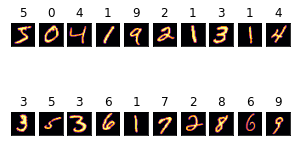

In [ ]:
figure = plt.figure(figsize = (5,3))
for i in range(20):
  grid = figure.add_subplot(2, 10, i+1, xticks = [], yticks = [])
  grid.imshow(np.squeeze(X_train[i]), cmap = 'inferno')
  grid.set_title(y_train[i])

In [ ]:
img_shape = X_train.shape[1:]
img_shape

(28, 28, 1)

##**Defining the Model**

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),

                                    tf.keras.layers.Dense(128, activation = 'relu'), 

                                    tf.keras.layers.Dense(10)

                                  ])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


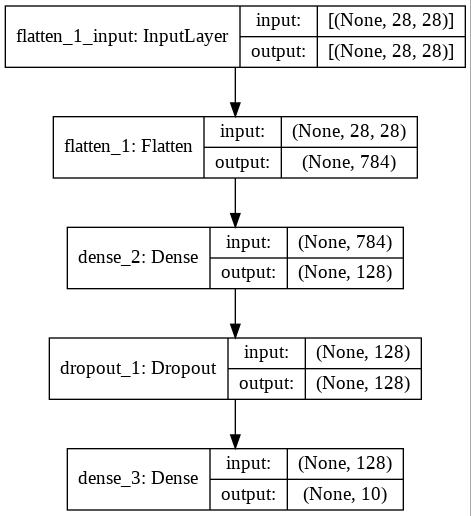

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

In [ ]:
predictions = model(X_train[:1]).numpy()
predictions

array([[-0.03300932,  0.15206802, -0.06170002, -0.10366479, -0.39757538,
        -0.36418086, -0.5983861 , -0.03492768, -0.1370369 , -0.5000231 ]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.11609423, 0.13969752, 0.11281074, 0.10817461, 0.0806272 ,
        0.08336517, 0.06595848, 0.11587173, 0.10462417, 0.07277616]],
      dtype=float32)

##**Compiling the Model**

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer = 'adam', loss = loss_fn, metrics = ['accuracy'])

##**Traning the Actual Model**

In [ ]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2914 - accuracy: 0.9161
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1378 - accuracy: 0.9583
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1038 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0853 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0726 - accuracy: 0.9778


##**Evaluating the Model**

In [ ]:
model.evaluate(X_test, y_test, verbose = 5)

[0.075215645134449, 0.9768999814987183]

##**Probablity of the Model**

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[8.7054506e-09, 2.2237272e-08, 1.1720337e-05, 8.3024359e-05,
        2.1100454e-12, 9.4174560e-08, 2.5583797e-13, 9.9990475e-01,
        2.4740228e-08, 3.5510891e-07],
       [2.8715401e-09, 4.8664097e-05, 9.9995005e-01, 5.1675653e-07,
        7.2047292e-17, 5.5076214e-07, 3.1323963e-10, 1.6247130e-13,
        2.3460285e-07, 4.0574237e-12],
       [2.0800680e-07, 9.9831474e-01, 1.2537264e-04, 1.3911620e-06,
        8.8585140e-05, 4.9821847e-06, 4.9498149e-06, 1.3189327e-03,
        1.4018419e-04, 7.1992150e-07],
       [9.9938750e-01, 2.3684705e-09, 3.6758589e-04, 1.1405625e-06,
        1.3148410e-07, 2.3120733e-06, 1.9216393e-04, 4.6490328e-05,
        4.2022521e-08, 2.6610455e-06],
       [1.1753958e-06, 1.4594698e-09, 1.6561487e-06, 1.2393455e-08,
        9.9829561e-01, 1.2726481e-07, 2.6565556e-07, 8.8661443e-07,
        2.9167734e-07, 1.6998925e-03]], dtype=float32)>

##**Testing the Model**

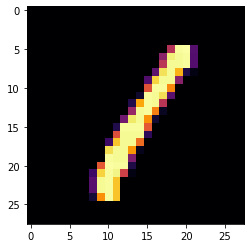

In [ ]:
img = X_train[3]
plt.imshow(np.squeeze(img), cmap = 'inferno')
plt.show()

##**Prediction result from the Model**

In [ ]:
img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
forecast = model.predict([img])
print("predicted: {}". format(argmax(forecast)))

predicted: 1
